In [ ]:
from PIL import Image, ImageDraw, ImageFont

def number_to_image(number, output_path='number_image.png', font_size=100):
    # Create a blank white image
    image_size = (100, 100)
    image = Image.new('RGB', image_size, 'white')
    draw = ImageDraw.Draw(image)

    # Use a built-in font or provide the path to a TrueType or OpenType font file
    font = ImageFont.load_default()

    # Calculate the position to center the text
    text = str(number)
    text_width, text_height = draw.textsize(text, font)
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)

    # Draw the number on the image
    draw.text(position, text, fill='black', font=font)

    # Save the image
    image.save(output_path)

# Example: Convert the number 42 to an image
number_to_image(425454, 'output_image.png',)


<ipython-input-13-336d9717691b>:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)


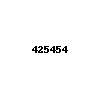

In [ ]:
from IPython.display import Image, display

# Specify the path to your image
image_path = 'output_image.png'

# Display the image
display(Image(filename=image_path))


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random

def create_maze_image_with_number_and_user(user_id, number, output_path='maze_image.png', maze_size=(200, 200), font_size=30):
    # Set a fixed seed based on the user ID and number
    seed = hash((user_id, number))
    random.seed(seed)

    # Create a blank white image
    image = Image.new('RGB', maze_size, 'white')
    draw = ImageDraw.Draw(image)

    # Draw the maze pattern
    draw_maze(draw, maze_size)

    # Use a built-in font or provide the path to a TrueType or OpenType font file
    font = ImageFont.load_default()

    # Calculate the position to center the text
    text = str(number)
    text_width, text_height = draw.textsize(text, font)
    position = ((maze_size[0] - text_width) // 2, (maze_size[1] - text_height) // 2)

    # Draw the number on the image
    draw.text(position, text, fill='black', font=font)

    # Save the image
    image.save(output_path)

def draw_maze(draw, maze_size):
    for i in range(0, maze_size[0], 20):
        for j in range(0, maze_size[1], 20):
            if random.random() < 0.4:  # Adjust this probability to control maze density
                draw.rectangle([i, j, i + 20, j + 20], fill='black')

# Example: Create a maze image with the number 42 for user with ID 1
create_maze_image_with_number_and_user(user_id=2, number=6574, output_path='maze_image_user_1.png')

# Example: Create a maze image with the number 42 for user with ID 2
create_maze_image_with_number_and_user(user_id=2, number=65715215454, output_path='maze_image_user_2.png')


<ipython-input-67-ea304ecdd58d>:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
<ipython-input-67-ea304ecdd58d>:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)


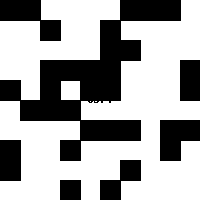

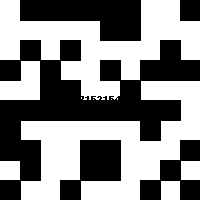

In [ ]:
from IPython.display import Image, display

# Specify the paths to your images
image_path_user_1 = 'maze_image_user_1.png'
image_path_user_2 = 'maze_image_user_2.png'

# Display the images
display(Image(filename=image_path_user_1))
display(Image(filename=image_path_user_2))


In [ ]:
import cv2
from matplotlib import pyplot as plt

# This line is used to display images in Jupyter notebooks
%matplotlib inline


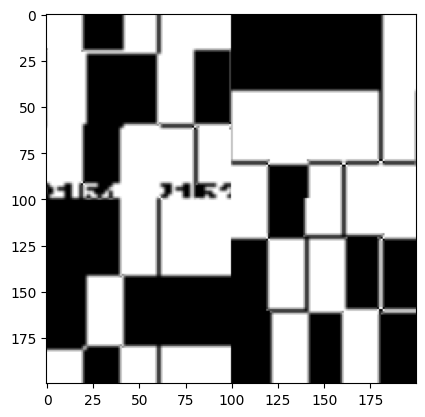

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def infinte_cube_XOR(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]

    # Expand horizontally
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform XOR operation between top and bottom section of images
    XOR_img = np.bitwise_xor(top_img, bottom_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-1, :]

    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape

    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))

#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    XOR_img = np.bitwise_xor(left_img, right_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

# Example usage
input_image = cv2.imread('/content/maze_image_user_2.png')  # Replace 'path/to/your/image.jpg' with the actual path to your input image
result_image = infinte_cube_XOR(input_image)

# Display the resulting image using plt.imshow
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()



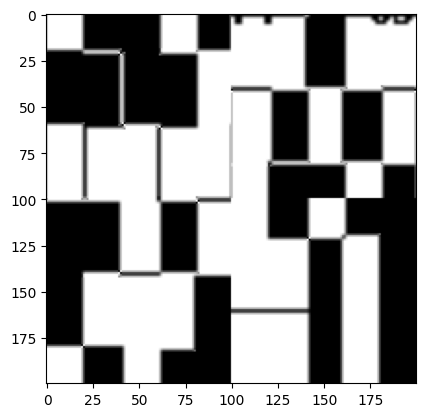

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def infinte_cube_XOR(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]

    # Expand horizontally
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform XOR operation between top and bottom section of images
    XOR_img = np.bitwise_xor(top_img, bottom_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-1, :]

    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape

    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))

#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    XOR_img = np.bitwise_xor(left_img, right_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

# Example usage
input_image = cv2.imread('/content/maze_image_user_1.png')  # Replace 'path/to/your/image.jpg' with the actual path to your input image
result_image = infinte_cube_XOR(input_image)

# Display the resulting image using plt.imshow
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()



In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random

def xor_to_rgb(xor_result):
    # Simple mapping function to convert XOR result to RGB values
    r = xor_result % 256
    g = (xor_result // 256) % 256
    b = (xor_result // 65536) % 256
    return r, g, b

def create_color_maze_image_with_xor(user_id, number, output_path='color_maze_image.png', maze_size=(200, 200), font_size=30):
    # XOR the user ID and the number
    xor_result = user_id ^ number

    # Map the XOR result to RGB values
    xor_color = xor_to_rgb(xor_result)

    # Create a blank white image
    image = Image.new('RGB', maze_size, 'white')
    draw = ImageDraw.Draw(image)

    # Draw the color maze pattern
    draw_color_maze(draw, maze_size, xor_color, user_id, number)

    # Use a built-in font or provide the path to a TrueType or OpenType font file
    font = ImageFont.load_default()

    # Calculate the position to center the text
    text = str(number)
    text_width, text_height = draw.textsize(text, font)
    position = ((maze_size[0] - text_width) // 2, (maze_size[1] - text_height) // 2)

    # Draw the number on the image with a different color
    text_color = 'black'  # You can choose a different color for the text
    draw.text(position, text, fill=text_color, font=font)

    # Save the image
    image.save(output_path)

def draw_color_maze(draw, maze_size, color, user_id, number):
    # Set a fixed seed for the random number generator based on user ID and number
    random.seed(hash((user_id, number)))

    # Use the chosen color for the maze walls
    for i in range(0, maze_size[0], 20):
        for j in range(0, maze_size[1], 20):
            if random.random() < 0.4:  # Adjust this probability to control maze density
                draw.rectangle([i, j, i + 20, j + 20], fill=color)

# Example: Create a color maze image with XOR of user ID 33 and number 24345223
create_color_maze_image_with_xor(user_id=33, number=435435, output_path='4final.png')


<ipython-input-103-ee68c1562b8c>:30: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)


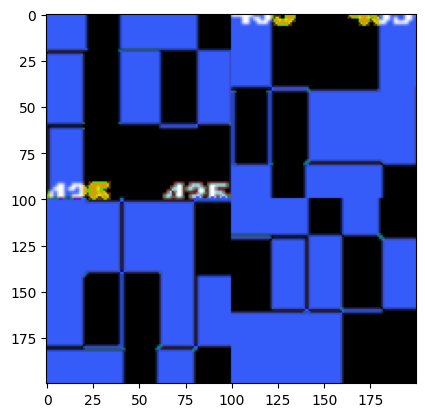

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def infinte_cube_XOR(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]

    # Expand horizontally
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform XOR operation between top and bottom section of images
    XOR_img = np.bitwise_xor(top_img, bottom_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-1, :]

    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape

    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))

#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    XOR_img = np.bitwise_xor(left_img, right_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

# Example usage
input_image = cv2.imread('/content/4final.png')  # Replace 'path/to/your/image.jpg' with the actual path to your input image
result_image = infinte_cube_XOR(input_image)

# Display the resulting image using plt.imshow
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

